In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy import stats

In [2]:
file_path = "F:/SET_3/DAATAA.csv" 
df = pd.read_csv(file_path)

In [3]:
coloumn_to_drop = 'STATE'
df = df.drop(coloumn_to_drop,axis=1)

In [4]:
df.head()

,YEAR,DEATHS_MEN,DEATHS_WOMEN,POPULATION,INTAKE_CAPACITY_MALE,INTAKE_CAPACITY_FEMALE,OCCUPANCY_MALE,OCCUPANCY_FEMALE,TOTAL_OCCUPANCY
0,2020,165,100,45500,2,2,0,0,0
1,2020,14,4,2951,65,20,54,313,367
2,2020,130,71,187085,381,354,158,202,360
3,2020,34,21,425047,100,100,84,72,156
4,2020,33,2,18370,15,15,12,3,15


In [5]:
import numpy as np


In [6]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Apply outlier removal to specific columns
columns_to_remove_outliers = ['DEATHS_MEN','DEATHS_WOMEN','POPULATION','INTAKE_CAPACITY_MALE','INTAKE_CAPACITY_FEMALE','OCCUPANCY_MALE','OCCUPANCY_FEMALE','TOTAL_OCCUPANCY']  # Add more columns if needed
for column in columns_to_remove_outliers:
    df = remove_outliers_iqr(df, column)

# Print the DataFrame after removing outliers
print(df)








    YEAR  DEATHS_MEN  DEATHS_WOMEN  POPULATION  INTAKE_CAPACITY_MALE  \
3   2020          34            21      425047                   100   
4   2020          33             2       18370                    15   
5   2020          72            19      191938                   110   
7   2020           3             0        1165                    55   
8   2020          24            13       14601                    70   
10  2020          15             6      212238                    72   
11  2020          74             6       44449                    25   
12  2020           3             1      119037                    40   
15  2020           2             1      524454                    25   
16  2020           2             0        2230                    42   
17  2020           5             2       19191                    45   
18  2020           5             0        6703                     0   
20  2020          14             7      229846                  

In [7]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[['YEAR','DEATHS_MEN','DEATHS_WOMEN','POPULATION','INTAKE_CAPACITY_MALE','INTAKE_CAPACITY_FEMALE','OCCUPANCY_MALE','OCCUPANCY_FEMALE','TOTAL_OCCUPANCY']]= scaler.fit_transform(df[['YEAR','DEATHS_MEN','DEATHS_WOMEN','POPULATION','INTAKE_CAPACITY_MALE','INTAKE_CAPACITY_FEMALE','OCCUPANCY_MALE','OCCUPANCY_FEMALE','TOTAL_OCCUPANCY']])


In [8]:
df.head()

,YEAR,DEATHS_MEN,DEATHS_WOMEN,POPULATION,INTAKE_CAPACITY_MALE,INTAKE_CAPACITY_FEMALE,OCCUPANCY_MALE,OCCUPANCY_FEMALE,TOTAL_OCCUPANCY
3,0.0,0.608696,1.307692,1.865914,1.248619,0.716667,1.562914,0.649057,1.078212
4,0.0,0.573913,-0.153846,-0.175511,-0.629834,-0.700000,-0.344371,-0.392453,-0.497207
5,0.0,1.930435,1.153846,0.695760,1.469613,0.716667,2.251656,1.071698,1.681564
7,0.0,-0.469565,-0.307692,-0.261876,0.254144,2.133333,0.715232,1.554717,1.391061
8,0.0,0.260870,0.692308,-0.194431,0.585635,0.050000,0.026490,-0.105660,-0.128492


In [9]:
import matplotlib.pyplot as plt


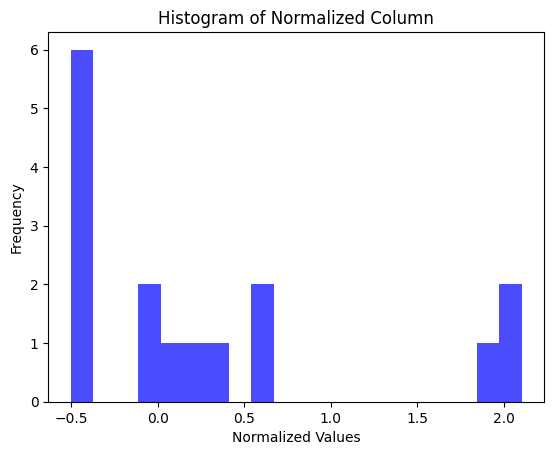

In [10]:
plt.hist(df['DEATHS_MEN'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Normalized Values')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Column')
plt.show()

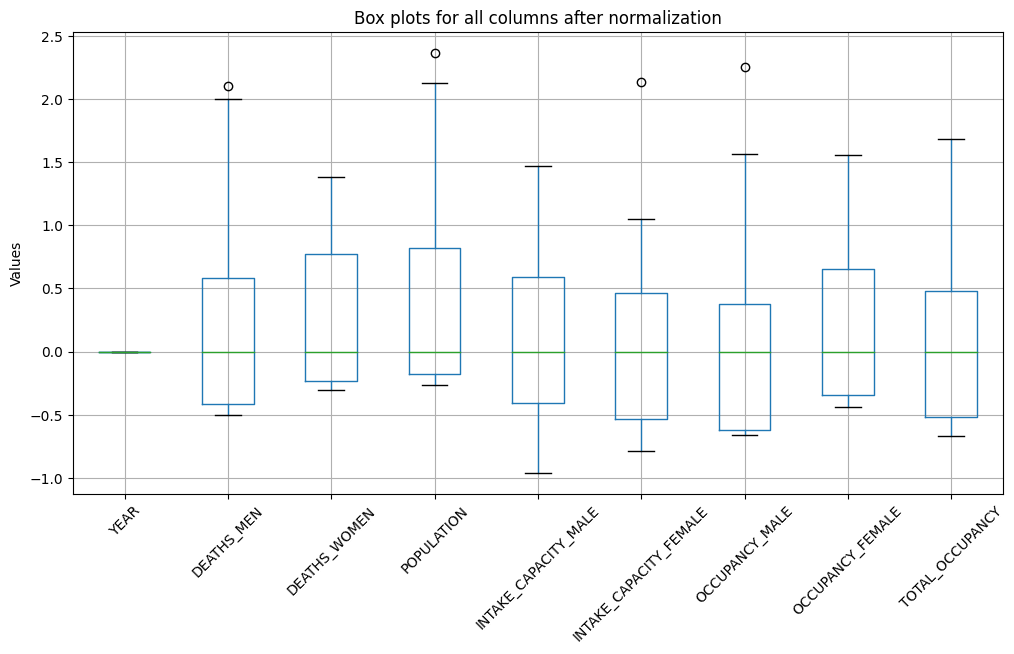

In [11]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title('Box plots for all columns after normalization')
plt.ylabel('Values')
plt.show()

In [12]:
df['DEATH'] = df['DEATHS_MEN'] + df['DEATHS_WOMEN']

In [13]:
df.head()

,YEAR,DEATHS_MEN,DEATHS_WOMEN,POPULATION,INTAKE_CAPACITY_MALE,INTAKE_CAPACITY_FEMALE,OCCUPANCY_MALE,OCCUPANCY_FEMALE,TOTAL_OCCUPANCY,DEATH
3,0.0,0.608696,1.307692,1.865914,1.248619,0.716667,1.562914,0.649057,1.078212,1.916388
4,0.0,0.573913,-0.153846,-0.175511,-0.629834,-0.700000,-0.344371,-0.392453,-0.497207,0.420067
5,0.0,1.930435,1.153846,0.695760,1.469613,0.716667,2.251656,1.071698,1.681564,3.084281
7,0.0,-0.469565,-0.307692,-0.261876,0.254144,2.133333,0.715232,1.554717,1.391061,-0.777258
8,0.0,0.260870,0.692308,-0.194431,0.585635,0.050000,0.026490,-0.105660,-0.128492,0.953177


# MODEL BUILDING


# Linear regression

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
X = df[['YEAR','POPULATION','INTAKE_CAPACITY_MALE', 'INTAKE_CAPACITY_FEMALE', 'OCCUPANCY_MALE', 'OCCUPANCY_FEMALE']]
y = df['DEATH'] 

In [17]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model = LinearRegression()

In [19]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Make predictions on the test data
predictions = model.predict(X_test)

In [24]:
# Calculate model performance metrics
from math import sqrt
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
r2 = r2_score(y_test, predictions)

In [41]:
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 0.11443841806485687
Root Mean Squared Error: 0.3382874784334426
R-squared: 0.7770072627835899


# XGBoost

In [25]:
pip install xgboost

You should consider upgrading via the 'c:\Users\Aroma\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [26]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, f1_score
from math import sqrt

In [27]:
X = df.drop(columns=['DEATH'])
y = df['DEATH']

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Initialize and fit the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [30]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [31]:
# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)

In [32]:
# Calculate R-squared value
r_squared = r2_score(y_test, predictions)


In [33]:
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")

MSE: 0.11443841806485687
RMSE: 0.3382874784334426
R-squared: 0.7770072627835899


# Lasso regression

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [46]:
X = df.drop(columns=['DEATH'])
y = df['DEATH']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Initialize and fit the Lasso regression model
alpha = 0.1  
# Lasso regularization parameter (adjust as needed)
lasso_model = Lasso(alpha=alpha, random_state=42)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=42)

In [49]:
predictions = lasso_model.predict(X_test)

In [50]:
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)

In [51]:
# Calculate R-squared value
r_squared = r2_score(y_test, predictions)


In [52]:
# Print the metrics
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")

MSE: 0.12609433471540055
RMSE: 0.35509764110086756
R-squared: 0.7542947436608771


# Gradiant boosting regressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

In [54]:
X = df.drop(columns=['DEATH'])
y = df['DEATH']

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Initialize and fit the Gradient Boosting regression model
n_estimators = 100  
# Number of boosting stages to be run
learning_rate = 0.1 
# Step size shrinkage to prevent overfitting
gb_model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [57]:
# Make predictions on the test set
predictions = gb_model.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)

In [59]:
# Calculate R-squared value
r_squared = r2_score(y_test, predictions)

In [60]:
# Print the metrics
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")

MSE: 0.3861407461781027
RMSE: 0.6214022418515263
R-squared: 0.24757276972981146


# Polynomial regression

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [35]:
X = df.drop(columns=['DEATH'])
y = df['DEATH']

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Polynomial Features transformation (degree of polynomial features)
degree = 2  # You can adjust the degree of polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [38]:
# Initialize and fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [39]:
# Make predictions on the test set
predictions = poly_reg.predict(X_test_poly)

In [40]:
# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)

In [41]:
# Calculate R-squared value
r_squared = r2_score(y_test, predictions)

In [42]:
# Print the metrics
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")

MSE: 0.035001980477336714
RMSE: 0.1870881623121482
R-squared: 0.9317957416170053


# prediction using polynomial regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

In [44]:
X_past = df.drop(columns=['DEATH'])

In [45]:
# Apply polynomial feature transformation with the same degree used during training
degree = 2  # Use the same degree as used during training
poly = PolynomialFeatures(degree=degree)
X_past_poly = poly.fit_transform(X_past)

In [46]:
# Use the trained model to make predictions
predictions = poly_reg.predict(X_past_poly)

In [47]:
predictions_df = pd.DataFrame({
    
    'Predicted_DEATH': predictions
})

# Print or save the predictions
print(predictions_df)

    Predicted_DEATH
0          1.797916
1          0.292737
2          3.084281
3         -0.777258
4          0.953177
5          0.335723
6          2.153846
7         -0.700334
8         -0.735117
9         -0.812040
10        -0.553846
11        -0.707692
12         0.143813
13         3.488963
14         1.061175
15        -0.101672


In [48]:
import pandas as pd

# List of state values corresponding to the 16 predicted death values
states = ['ANDHRA PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH', 'DAMAN & DIU', 'GOA', 'GUJARAT', 'HARYANA',
          'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MANIPUR', 'MIZORAM', 'PUDUCHERRY', 'TAMIL NADU', 'TELANGANA']

predicted_deaths = [1.797916,0.292737,3.084281,-0.777258,0.953177, 0.335723,2.153846,-0.700334,-0.735117,-0.812040, -0.553846, -0.707692, 0.143813,3.488963, 1.061175, -0.101672]
        

# Create a new DataFrame with state values and corresponding predicted deaths
data={
    'State': states,
    'Predicted_Deaths': predicted_deaths
}
result_df = pd.DataFrame(data)

# Print or use the result_df DataFrame as needed
print(result_df)


             State  Predicted_Deaths
0   ANDHRA PRADESH          1.797916
1            ASSAM          0.292737
2            BIHAR          3.084281
3     CHHATTISGARH         -0.777258
4      DAMAN & DIU          0.953177
5              GOA          0.335723
6          GUJARAT          2.153846
7          HARYANA         -0.700334
8        KARNATAKA         -0.735117
9           KERALA         -0.812040
10  MADHYA PRADESH         -0.553846
11         MANIPUR         -0.707692
12         MIZORAM          0.143813
13      PUDUCHERRY          3.488963
14      TAMIL NADU          1.061175
15       TELANGANA         -0.101672


In [49]:
import matplotlib.pyplot as plt

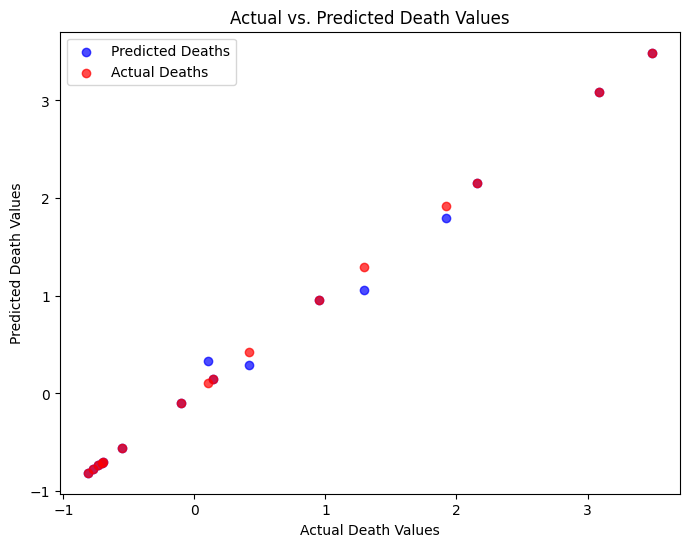

In [50]:
# Extract features from past data (excluding 'DEATH' column)
X_past = df.drop(columns=['DEATH'])

# Apply polynomial feature transformation (use the same degree as used during training)
degree = 2  # Use the same degree as used during training
poly = PolynomialFeatures(degree=degree)
X_past_poly = poly.fit_transform(X_past)

# Use the trained model to predict death values for past data
predicted_deaths = poly_reg.predict(X_past_poly)

# Actual death values from past data
actual_deaths = df['DEATH']

# Plot actual vs. predicted death values
plt.figure(figsize=(8, 6))
plt.scatter(actual_deaths, predicted_deaths, color='blue', label='Predicted Deaths', alpha=0.7)
plt.scatter(actual_deaths, actual_deaths, color='red', label='Actual Deaths', alpha=0.7)
plt.xlabel('Actual Death Values')
plt.ylabel('Predicted Death Values')
plt.title('Actual vs. Predicted Death Values')
plt.legend()
plt.show()
